# 10 Transmission simulator in FBS
The method of transmission simulator is primarly used direclty in the modal domain. Nevertheless, the concept of attaching a transmission simulator at the interface can be used also in the frequency domain. In this example a frequency based subtructuring is performed on a complex structure. First a transmission simulator is decoupled from the receiver structure and aftewards a source structure is coupled to the receiver structure. At the interface the VPT is used to obtain collocated interface DoFs.

In [2]:
import pyFBS

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

#### Example Datasests
Load the required predefined datasets:

In [3]:
pyFBS.download_automotive_testbench()

100%|████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 9976.94it/s]

In [4]:
stl_rec = r"./automotive_testbench/STL/receiver.stl"
stl_tm = r"./automotive_testbench/STL/transmission_mount.stl"
stl_rm = r"./automotive_testbench/STL/roll_mount.stl"
stl_em = r"./automotive_testbench/STL/engine_mount.stl"
stl_ts = r"./automotive_testbench/STL/ts.stl"
stl_shaker = r"./automotive_testbench/STL/shaker_only.stl"

xlsx_BTS =  r"./automotive_testbench/Measurements/BTS.xlsx"
xlsx_TS = r"./automotive_testbench/Measurements/TS.xlsx"
xlsx_A = r"./automotive_testbench/Measurements/A.xlsx"
xlsx_AB_ref = r"./automotive_testbench/Measurements/AB_ref.xlsx"

file_Y_BTS = r"./automotive_testbench/Measurements/BTS.p"
file_Y_TS = r"./automotive_testbench/Measurements/TS.p"
file_Y_A = r"./automotive_testbench/Measurements/A.p"
file_Y_AB_ref = r"./automotive_testbench/Measurements/AB_ref.p"

Load the sensor, channel and impact data:

In [5]:
df_acc_TS = pd.read_excel(xlsx_TS, sheet_name='Sensors')
df_imp_TS = pd.read_excel(xlsx_TS, sheet_name='Impacts')
df_chn_TS = pyFBS.generate_channels_from_sensors(df_acc_TS)

df_acc_BTS = pd.read_excel(xlsx_BTS, sheet_name='Sensors')
df_imp_BTS = pd.read_excel(xlsx_BTS, sheet_name='Impacts')
df_chn_BTS = pyFBS.generate_channels_from_sensors(df_acc_BTS)

df_acc_A = pd.read_excel(xlsx_A, sheet_name='Sensors')
df_imp_A = pd.read_excel(xlsx_A, sheet_name='Impacts')
df_chn_A = pyFBS.generate_channels_from_sensors(df_acc_A)

df_acc_AB_ref = pd.read_excel(xlsx_AB_ref, sheet_name='Sensors')
df_imp_AB_ref = pd.read_excel(xlsx_AB_ref, sheet_name='Impacts')
df_chn_AB_ref = pyFBS.generate_channels_from_sensors(df_acc_AB_ref)

Load experimental measurements:

In [6]:
freq, Y_BTS = np.load(file_Y_BTS,allow_pickle = True)
freq, Y_TS = np.load(file_Y_TS,allow_pickle = True)
freq, Y_A = np.load(file_Y_A,allow_pickle = True)
freq, Y_AB_ref = np.load(file_Y_AB_ref,allow_pickle = True)

#### Display
Open 3D viewer in the background.

In [7]:
view3D = pyFBS.view3D(show_origin = False, show_axes = False,shape =  (2,2),title = "Overview")

Add the STL file of structure B+TS to the 1-1 subplot and show the corresponding accelerometer, channels and impacts.

In [8]:
view3D.plot.subplot(0,0)
view3D.plot.isometric_view()

view3D.add_stl(stl_rec,name = "receiver_0",color = "#e0e0e0",opacity = 1)
view3D.add_stl(stl_tm,name = "transmission_mount_0",color = "#83afd2",opacity = 1)
view3D.add_stl(stl_rm,name = "roll_mount_0",color = "#83afd2",opacity = 1)
view3D.add_stl(stl_em,name = "engine_mount_0",color = "#83afd2",opacity = 1)
view3D.add_stl(stl_ts,name = "ts_0",color = "#FB6D4C",opacity = 1)

view3D.plot.add_text("B+TS", position='upper_left', font_size=10, color="k", font="times", name="B_structure")

view3D.show_acc(df_acc_BTS,scale = 1000,overwrite = False)
view3D.show_imp(df_imp_BTS,scale = 1000,overwrite = False)
view3D.show_chn(df_chn_BTS,scale = 1000,overwrite = False)

Add the STL file of structure TS to the 1-2 subplot and show the corresponding accelerometer, channels and impacts.

In [9]:
view3D.plot.subplot(0,1)
view3D.plot.isometric_view()

view3D.add_stl(stl_ts,name = "ts_1",color = "#FB6D4C",opacity = 1)

view3D.plot.add_text("TS", position='upper_left', font_size=10, color="k", font="times", name="B_structure")

view3D.show_acc(df_acc_TS,scale = 1000,overwrite = False)
view3D.show_imp(df_imp_TS,scale = 1000,overwrite = False)
view3D.show_chn(df_chn_TS,scale = 1000,overwrite = False)

Add the STL file of structure A to the 2-1 subplot and show the corresponding accelerometer, channels and impacts.

In [10]:
view3D.plot.subplot(1,0)
view3D.plot.isometric_view()

view3D.add_stl(stl_ts,name = "ts_2",color = "#FB6D4C",opacity = 1)
view3D.add_stl(stl_shaker,name = "shaker_only_2",color = "#FB6D4C",opacity = 1);

view3D.plot.add_text("A", position='upper_left', font_size=10, color="k", font="times", name="B_structure")

view3D.show_acc(df_acc_A,scale = 1000,overwrite = False)
view3D.show_imp(df_imp_A,scale = 1000,overwrite = False)
view3D.show_chn(df_chn_A,scale = 1000,overwrite = False)

Add the STL file of structure A+B to the 2-2 subplot and show the corresponding accelerometer, channels and impacts.

In [11]:
view3D.plot.subplot(1,1)
view3D.plot.isometric_view()

view3D.add_stl(stl_rec,name = "receiver_3",color = "#e0e0e0",opacity = 1)
view3D.add_stl(stl_tm,name = "transmission_mount_3",color = "#83afd2",opacity = 1)
view3D.add_stl(stl_rm,name = "roll_mount_3",color = "#83afd2",opacity = 1)
view3D.add_stl(stl_em,name = "engine_mount_3",color = "#83afd2",opacity = 1)
view3D.add_stl(stl_ts,name = "ts_3",color = "#FB6D4C",opacity = 1)
view3D.add_stl(stl_shaker,name = "shaker_only_3",color = "#FB6D4C",opacity = 1);

view3D.plot.add_text("A+B", position='upper_left', font_size=10, color="k", font="times", name="B_structure")

view3D.show_acc(df_acc_AB_ref,scale = 1000,overwrite = False)
view3D.show_imp(df_imp_AB_ref,scale = 1000,overwrite = False)
view3D.show_chn(df_chn_AB_ref,scale = 1000,overwrite = False)

#### Virtual point transformation
The VPT can be performed also on the experimental data. See the *04_VPT.ipynb* example for more options and details.

In [12]:
df_vp = pd.read_excel(xlsx_A, sheet_name='VP Channels')
df_vpref = pd.read_excel(xlsx_A, sheet_name='VP RefChannels')

vpt_TS = pyFBS.VPT(df_chn_TS,df_imp_TS,df_vp,df_vpref,sort_matrix = False)
vpt_BTS = pyFBS.VPT(df_chn_BTS,df_imp_BTS,df_vp,df_vpref,sort_matrix = False)
vpt_A = pyFBS.VPT(df_chn_A,df_imp_A,df_vp,df_vpref,sort_matrix = False)

vpt_TS.apply_VPT(freq,Y_TS)
vpt_BTS.apply_VPT(freq,Y_BTS)
vpt_A.apply_VPT(freq,Y_A)

Y_TS_tran = vpt_TS.vptData
Y_BTS_tran = vpt_BTS.vptData
Y_A_tran = vpt_A.vptData

## LM-FBS coupling and decoupling
First the compatibility and the equiliubrium condition has to be defined through the signed Boolean matrices. For this example the 6 VP DoFs at the interface are coupled.

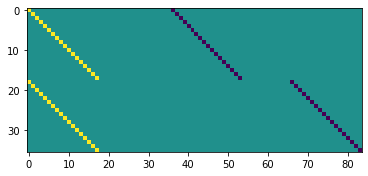

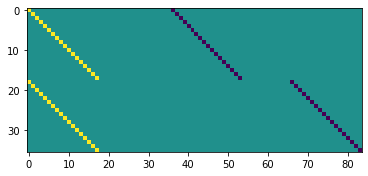

In [13]:
Y_AnB = np.zeros((800,30+36+18,30+36+18),dtype = complex)

Y_AnB[:,0:36,0:36] = Y_BTS_tran
Y_AnB[:,36:36+30,36:36+30] = -1*Y_TS_tran
Y_AnB[:,30+36:,30+36:] = Y_A_tran

k = 18
Bu = np.zeros((2*k,36+30+18))
Bu[:k,0:k] = 1*np.eye(k)
Bu[:k,36:36+k] = -1*np.eye(k)

Bu[k:,0:k] = 1*np.eye(k)
Bu[k:,36+30:36+30+k] = -1*np.eye(k)

Bf = np.zeros((2*k,36+30+18))
Bf[:k,0:k] = 1*np.eye(k)
Bf[:k,36:36+k] = -1*np.eye(k)

Bf[k:,0:k] = 1*np.eye(k)
Bf[k:,36+30:36+30+k] = -1*np.eye(k)

plt.figure()
plt.imshow(Bu)
plt.figure()
plt.imshow(Bf);

Apply the LM-FBS based on the defined coompatibility and equilibrium conditions.

In [14]:
Y_ABn = np.zeros_like(Y_AnB,dtype = complex)

Y_int = Bu@Y_AnB@Bf.T
Y_ABn = Y_AnB - Y_AnB@Bf.T@np.linalg.pinv(pyFBS.TSVD(Y_int,reduction = 22))@Bu@Y_AnB

First extract the FRFs at the reference DoFs:

In [15]:
arr_out = [30,31,32,33,34,35]
arr_in = [30,31,32,33,34,35]


Y_AB_coupled = Y_ABn[:,arr_out,:][:,:,arr_in]
Y_AB_ref = Y_AB_ref[:,:,:]

Finnaly, the coupled and the reference results can be compared:

(0.0, 2000.0)

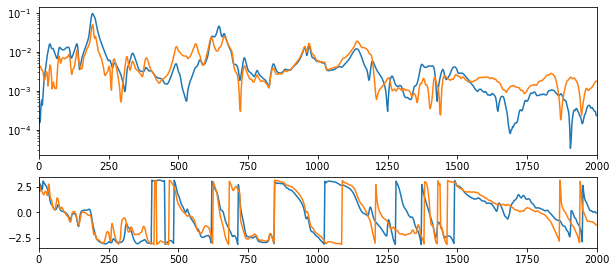

In [16]:
s1 = 3
s2 = 3

plt.figure(figsize = (10,6))
plt.subplot(211)
plt.semilogy(freq,np.abs(Y_AB_ref[:,s1,s2]))
plt.semilogy(freq,np.abs(Y_AB_coupled[:,s1,s2]))
plt.xlim(0,2000)


plt.subplot(413)
plt.plot(freq,np.angle(Y_AB_ref[:,s1,s2]))
plt.plot(freq,np.angle(Y_AB_coupled[:,s1,s2]))


plt.xlim(0,2000)